## Comparing Different models - MehmetS

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import ta

from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta, RNNModel, NBEATSModel
from darts.metrics import mape, rmse

/home/mehmet/.pyenv/versions/assist_trader/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from darts.models import StatsForecastAutoTheta

In [3]:
df = pd.read_csv("../raw_data/20230609-170514-daily-processed-data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   timestamp                   1362 non-null   object 
 1   open                        1362 non-null   float64
 2   high                        1362 non-null   float64
 3   low                         1362 non-null   float64
 4   close                       1362 non-null   float64
 5   volume                      1362 non-null   float64
 6   volume_CMF                  1362 non-null   float64
 7   volume_FII                  1362 non-null   float64
 8   volume_MFI                  1362 non-null   float64
 9   volume_VWA                  1362 non-null   float64
 10  mom_AOI                     1362 non-null   float64
 11  mom_PPO                     1362 non-null   float64
 12  mom_PPO_signal              1362 non-null   float64
 13  mom_PVO                     1362 

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [6]:
freq = '1d'
target_col = 'close'
time_col = 'timestamp'
series = TimeSeries.from_dataframe(df, time_col=time_col, value_cols=[target_col], freq=freq)

In [19]:
model = StatsForecastAutoTheta()

In [20]:
train, val = series.split_after(pd.Timestamp('2023-01-01'))

In [26]:
model.fit(train)
forecast = model.predict(1)
print("model {} obtains MAPE: {:.2f}%".format(model, mape(val[0], forecast)))

model StatsForecastAutoTheta() obtains MAPE: 0.29%


In [27]:
forecast = model.predict(1)
print("Model {} obtains RMSE: {:.2f}".format(model, rmse(val[0], forecast)))

Model StatsForecastAutoTheta() obtains RMSE: 47.92


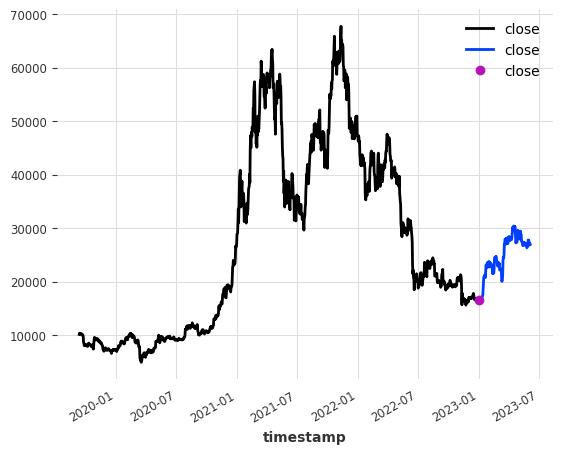

In [23]:
train.plot()
val.plot()
forecast.plot()

In [13]:
hf = model.historical_forecasts(train)

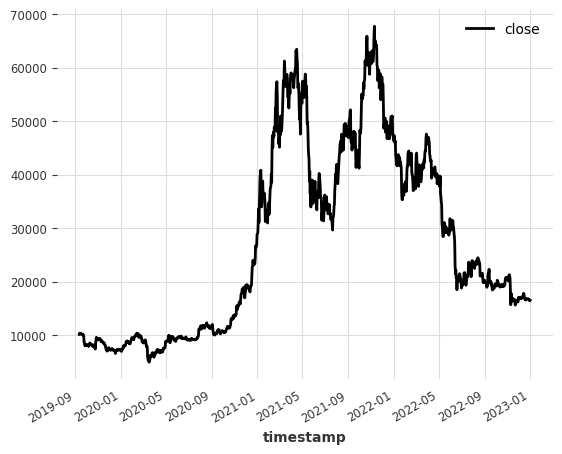

In [14]:
train.plot()

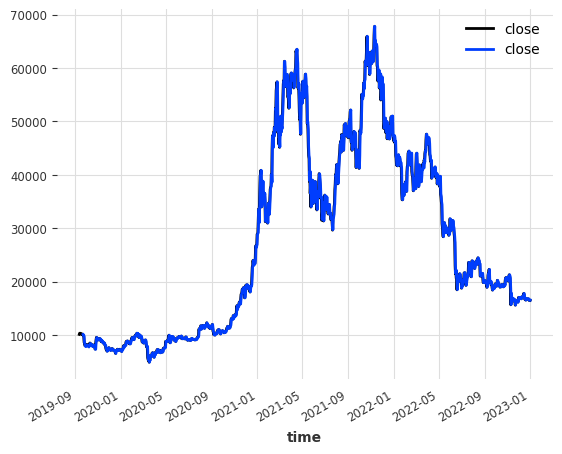

In [15]:
train.plot()
hf.plot()

In [20]:
def eval_model1(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print("Model {} obtains RMSE: {:.2f}".format(model, rmse(val, forecast)))

In [22]:
eval_model1(ExponentialSmoothing())
eval_model1(TBATS())
eval_model1(AutoARIMA())
eval_model1(Theta())

Model ExponentialSmoothing() obtains RMSE: 16681.79


/home/mehmet/.pyenv/versions/assist_trader/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Model TBATS() obtains RMSE: 9190.43
Model AutoARIMA() obtains RMSE: 9230.82
Model Theta() obtains RMSE: 8195.30


In [24]:
def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, forecast)))

In [8]:
eval_model(ExponentialSmoothing())
eval_model(TBATS())
eval_model(AutoARIMA())
eval_model(Theta())

model ExponentialSmoothing() obtains MAPE: 57.49%


/home/mehmet/.pyenv/versions/assist_trader/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


model TBATS() obtains MAPE: 32.28%
model AutoARIMA() obtains MAPE: 32.47%
model Theta() obtains MAPE: 28.86%


In [9]:
eval_model(NBEATSModel(input_chunk_length=14, output_chunk_length=2))

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.1 M 
---------------------------------------------------
6.1 M     Trainable params
1.4 K     Non-trainable params
6.1 M     Total params
24.466    Total

Epoch 99: 100%|█████████████████████████████████████████████████████| 38/38 [00:01<00:00, 19.27it/s, train_loss=6.92e+5]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|█████████████████████████████████████████████████████| 38/38 [00:01<00:00, 19.25it/s, train_loss=6.92e+5]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.36it/s]
model NBEATSModel(input_chunk_length=14, output_chunk_length=2) obtains MAPE: 40.36%


In [10]:
thetas = 2 - np.linspace(-10, 10, 50)

best_mape = float("inf")
best_theta = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

In [11]:
best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print(
    "The MAPE is: {:.2f}, with theta = {}.".format(
        mape(val, pred_best_theta), best_theta
    )
)

The MAPE is: 9.54, with theta = -0.24489795918367463.


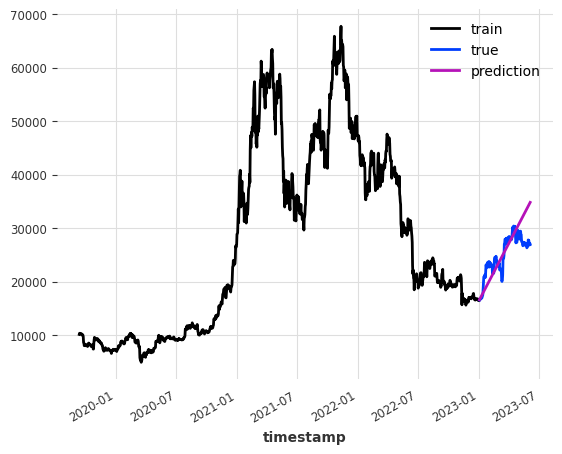

In [29]:
train.plot(label="train")
val.plot(label="true")
pred_best_theta.plot(label="prediction")

TypeError: StatsForecastAutoTheta.fit() missing 1 required positional argument: 'series'